# Decision Trees Exersice 

### First Step : Download __[Titanic Data](https://www.kaggle.com/c/titanic/data)__  
- **NOTE** : use only  file `train.csv`from data.
#### 1. Import library of pandas and numpy

In [48]:
pip install scikit-plot

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2. Load Data using Pandas

In [2]:
df = pd.read_csv('train.csv')

#### 3. Check column in Dataset and Drop useless columns 

- **Hint** : useless columns `Name`, `Ticket`,`PassengerId` and `Cabin`

In [3]:
df_copy = df.copy()

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
columns = df_copy[['Name','Ticket','PassengerId','Cabin']]

In [6]:
df_cleaned = df_copy.drop(columns, axis = 1)

In [7]:
df_cleaned.shape

(891, 8)

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### 4. Checking null values in each column and Handle with Mode

- **Hint** : 
- 1. for `Age` use Mode since there is outliers in this column
- 2. for `Embarked` use Mode since it is a categorical variable


In [9]:
df_cleaned['Age'].fillna(df_cleaned['Age'].mode()[0], inplace=True)

In [10]:
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

#### 5. Handle Categorical Data using `get_Dummies()` in pandas 

- **Hint** : Handle only columns `Sex` and `Embarked`
- 
 Read this document on how to use [`get_Dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)  

In [11]:
df_cleaned['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
emb_categ = pd.get_dummies(df_cleaned['Embarked'])

In [13]:
emb_categ

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [14]:
# merge dummies to original data frame
df_testing = pd.concat([df_cleaned,emb_categ], axis =1)
df_testing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [15]:
# convert sex column into binary variable where male = 1 , femal;e = 0
df_testing["Sex"] = np.where(df_testing["Sex"].str.contains("female"), 0, 1)

In [16]:
df_testing['Sex'].unique()

array([1, 0])

#### 6.  Separate  X ( features ) from  Y (labels)
**Hint** : 
- goal : predict only passengers survive and or not be

In [17]:
df_testing.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [22]:
df_final = df_testing[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','C','Q','S']]
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [24]:
X = df_final.iloc[:,1:]
y = df_final.iloc[:,:1]


#### 7. Split data into the Training data and Test data by `random_state=5` and `test_size=0.25`

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 5)


#### 8. Scale all Data using `StandardScaler` 

In [26]:
# Perform pre-processing to scale numeric features
scale = preprocessing.StandardScaler()
X_train = scale.fit_transform(X_train)

# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)

#### 9.Building your model ( Decision Tree )
 Use the default sklearn parameters with `random_state=1`

In [28]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

#### 10. Use  pruning  decision Tree to determine the best maximum depth for test data

In [34]:
scores = []

for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scores.append(tree.score(X_test, y_test))


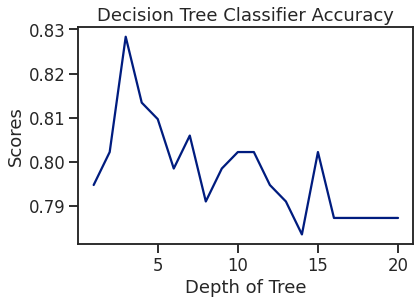

In [35]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('ticks')

plt.plot(range(1, 21), scores)
plt.xlabel("Depth of Tree")
plt.ylabel("Scores")
plt.title("Decision Tree Classifier Accuracy")
plt.show()

 Optimal of 82.9% can be achieved at depth of 4

#### 11.Building your model ( Random Forest)
 - Use parameters with  `oob_score=True` , `random_state=1`, ` warm_start=True` and `n_jobs=-1` .
 - Use number of trees in range 200 : 300

In [36]:
RF = RandomForestClassifier(oob_score=True, random_state=1, 
                            warm_start=True, n_jobs=-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  af

[Text(0, 0.5, 'out-of-bag error'),
 Text(0.5, 1.0, 'Evaluation of Out-of-Bag Error')]

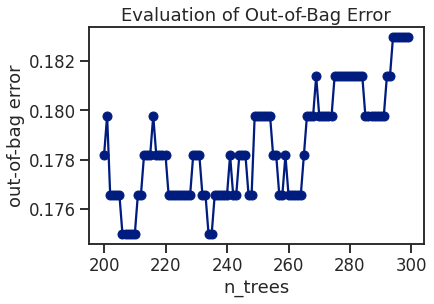

In [41]:
oob_list = list()
for n_trees in range(200,300):
    RF.set_params(n_estimators=n_trees)  # Set number of trees
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_ # Obtain the oob error
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error',
      title='Evaluation of Out-of-Bag Error')

In [42]:
# Create the model with 205 trees
forest = RandomForestClassifier(n_estimators=205, random_state=1, n_jobs=-1)

# Fit training data and training labels to forest
forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=205,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [43]:
n_nodes = []
max_depths = []

for ind_tree in forest.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Random Forest has an average number of nodes {int(np.mean(n_nodes))} with an average maximum depth of {int(np.mean(max_depths))}.')

print(f'Model Accuracy for train data: {forest.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {forest.score(X_test, y_test)}')

Random Forest has an average number of nodes 256 with an average maximum depth of 16.
Model Accuracy for train data: 0.985553772070626
Model Accuracy for test data: 0.8022388059701493


#### 12. Calculate Confusion Matrix ,precision,recall and F1-score for the Decision Tree model & Random Forest

In [44]:
# Predict target variables (ie. labels) for each classifer
dt_classifier_name = ["Decision Tree"]
dt_predicted_labels = tree.predict(X_test)

rf_classifier_name = ["Random Forest"]
rf_predicted_labels = forest.predict(X_test)


In [45]:
print("Classification Report for",dt_classifier_name, " :\n ",
      metrics.classification_report(y_test, dt_predicted_labels, 
                                    target_names=['Survived','Not Survived']))

print("Classification Report for ",rf_classifier_name, " :\n ",
      metrics.classification_report(y_test, rf_predicted_labels,
                                   target_names=['Survived','Not survived']))

Classification Report for ['Decision Tree']  :
                precision    recall  f1-score   support

    Survived       0.83      0.83      0.83       167
Not Survived       0.72      0.71      0.72       101

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

Classification Report for  ['Random Forest']  :
                precision    recall  f1-score   support

    Survived       0.82      0.87      0.85       167
Not survived       0.77      0.68      0.72       101

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



Confusion Matrix for ['Decision Tree']


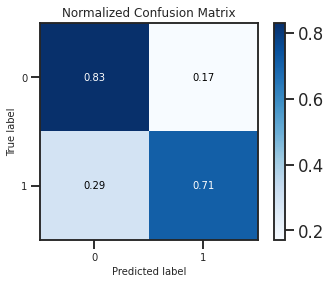

Confusion Matrix for ['Random Forest']


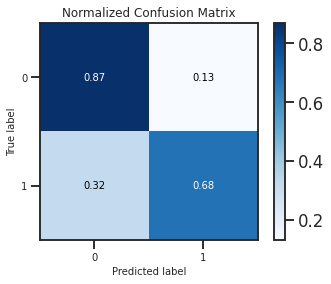

In [50]:
print("Confusion Matrix for",dt_classifier_name)
skplt.metrics.plot_confusion_matrix(y_test, dt_predicted_labels, normalize=True)
plt.show()

print("Confusion Matrix for",rf_classifier_name)
skplt.metrics.plot_confusion_matrix(y_test, rf_predicted_labels, normalize=True)
plt.show()

#### 13.Building your model (SVM )
 Use the default sklearn parameters with `random_state=1`

In [57]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs

In [60]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', random_state=1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 12. Calculate Confusion Matrix ,precision,recall and F1-score for the SVM model

In [62]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7947761194029851
Precision: 0.7738095238095238
Recall: 0.6435643564356436
